# Data Analysis

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

In [2]:
df  = pd.read_csv("../artifacts/raw/eCommerce_Customer_support_data.csv")

In [3]:
df.shape

(85907, 20)

## Dataset Oerview

In [4]:
df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


## Check for null values

In [5]:
df.isna().sum()

Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64

## Drop Unecessary Columns

In [6]:
df = df.drop(columns=['Unique id', 'connected_handling_time'])

In [7]:
df.shape

(85907, 18)

## Dataset information

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   channel_name          85907 non-null  object 
 1   category              85907 non-null  object 
 2   Sub-category          85907 non-null  object 
 3   Customer Remarks      28742 non-null  object 
 4   Order_id              67675 non-null  object 
 5   order_date_time       17214 non-null  object 
 6   Issue_reported at     85907 non-null  object 
 7   issue_responded       85907 non-null  object 
 8   Survey_response_Date  85907 non-null  object 
 9   Customer_City         17079 non-null  object 
 10  Product_category      17196 non-null  object 
 11  Item_price            17206 non-null  float64
 12  Agent_name            85907 non-null  object 
 13  Supervisor            85907 non-null  object 
 14  Manager               85907 non-null  object 
 15  Tenure Bucket      

## Check for duplicates

In [9]:
df.duplicated().value_counts()

False    85906
True         1
Name: count, dtype: int64

## Drop Duplicates

In [10]:
df.drop_duplicates(inplace = True)

In [11]:
df.duplicated().value_counts()

False    85906
Name: count, dtype: int64

In [12]:
df.isnull().sum().sort_values(ascending=False)

Customer_City           68827
Product_category        68710
Item_price              68700
order_date_time         68692
Customer Remarks        57164
Order_id                18231
category                    0
channel_name                0
Sub-category                0
Issue_reported at           0
Survey_response_Date        0
issue_responded             0
Agent_name                  0
Supervisor                  0
Manager                     0
Tenure Bucket               0
Agent Shift                 0
CSAT Score                  0
dtype: int64

## Dropping ***Order ID*** because not required according to this problem statement

In [13]:
df = df.drop(columns = ['Order_id'])

In [14]:
df.shape

(85906, 17)

## Filtering out ***Categorical columns***

In [15]:
categorical_cols= df.select_dtypes(include=['object', 'category'])

In [16]:
categorical_cols_list = categorical_cols.columns.tolist()

In [17]:
categorical_cols_list

['channel_name',
 'category',
 'Sub-category',
 'Customer Remarks',
 'order_date_time',
 'Issue_reported at',
 'issue_responded',
 'Survey_response_Date',
 'Customer_City',
 'Product_category',
 'Agent_name',
 'Supervisor',
 'Manager',
 'Tenure Bucket',
 'Agent Shift']

## Getting overview of all ***Categoraical Columns***

In [18]:
for col in categorical_cols_list:
    print(f"\n--- Value Counts for Column: '{col}' ---")
    # Store the result in a variable and print it
    counts = df[col].value_counts()
    print(counts)


--- Value Counts for Column: 'channel_name' ---
channel_name
Inbound    68141
Outcall    14742
Email       3023
Name: count, dtype: int64

--- Value Counts for Column: 'category' ---
category
Returns               44097
Order Related         23214
Refund Related         4550
Product Queries        3692
Shopzilla Related      2792
Payments related       2327
Feedback               2294
Cancellation           2212
Offers & Cashback       480
Others                   99
App/website              84
Onboarding related       65
Name: count, dtype: int64

--- Value Counts for Column: 'Sub-category' ---
Sub-category
Reverse Pickup Enquiry              22389
Return request                       8523
Delayed                              7388
Order status enquiry                 6922
Installation/demo                    4115
Fraudulent User                      4108
Product Specific Information         3589
Refund Enquiry                       2665
Wrong                                2597
Missi

## Filtering out all numerical columns

In [19]:
numerical_cols= df.select_dtypes(include=['int64', 'float64'])

In [20]:
numerical_cols_list = numerical_cols.columns.tolist()

In [21]:
numerical_cols_list

['Item_price', 'CSAT Score']

## Describing ***Numerical features***

In [22]:
df.describe()

,Item_price,CSAT Score
count,17206.000000,85906.000000
mean,5660.774846,4.242148
std,12825.728411,1.378909
min,0.000000,1.000000
25%,392.000000,4.000000
50%,979.000000,5.000000
75%,2699.750000,5.000000
max,164999.000000,5.000000


# **Handling all missing values**

## Filling out all categorical missing vales with their ***Mode(Most frequent values)***

In [23]:
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0] if df[col].mode().size > 0 else 'Unknown')

In [24]:
df['Customer Remarks'] = df['Customer Remarks'].fillna('No remarks')

## Fill datetime columns

### Convert date columns safely and consistently

In [25]:
df['order_date_time'] = pd.to_datetime(df['order_date_time'], format='mixed', errors='coerce')
df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], format='mixed', errors='coerce')
df['issue_responded'] = pd.to_datetime(df['issue_responded'], format='mixed', errors='coerce')
df['Survey_response_Date'] = pd.to_datetime(df['Survey_response_Date'], format='mixed', errors='coerce')

## Fill numeric columns

In [26]:
df['Item_price'] = df['Item_price'].fillna(df['Item_price'].median())

In [27]:
df.isna().sum()

channel_name            0
category                0
Sub-category            0
Customer Remarks        0
order_date_time         0
Issue_reported at       0
issue_responded         0
Survey_response_Date    0
Customer_City           0
Product_category        0
Item_price              0
Agent_name              0
Supervisor              0
Manager                 0
Tenure Bucket           0
Agent Shift             0
CSAT Score              0
dtype: int64

## Fill logically

In [28]:
df['Issue_reported at'] = df['Issue_reported at'].fillna(df['order_date_time'])
median_response_time = (df['issue_responded'] - df['Issue_reported at']).median()
df['issue_responded'] = df['issue_responded'].fillna(df['Issue_reported at'] + median_response_time)
df['order_date_time'] = df['order_date_time'].fillna(df['Issue_reported at'])

In [29]:
df.isna().sum()

channel_name            0
category                0
Sub-category            0
Customer Remarks        0
order_date_time         0
Issue_reported at       0
issue_responded         0
Survey_response_Date    0
Customer_City           0
Product_category        0
Item_price              0
Agent_name              0
Supervisor              0
Manager                 0
Tenure Bucket           0
Agent Shift             0
CSAT Score              0
dtype: int64

In [30]:
df['missing_order_time'] = df['order_date_time'].isna().astype(int)
df['missing_report_time'] = df['Issue_reported at'].isna().astype(int)
df['missing_response_time'] = df['issue_responded'].isna().astype(int)

# **Impute (Fill) Missing Dates for Numeric Feature Engineering**

## Median response delay

In [31]:
median_response_time = (df['issue_responded'] - df['Issue_reported at']).median()

## Impute logically

In [32]:
df['Issue_reported at'] = df['Issue_reported at'].fillna(df['order_date_time'])
df['issue_responded'] = df['issue_responded'].fillna(df['Issue_reported at'] + median_response_time)
df['order_date_time'] = df['order_date_time'].fillna(df['Issue_reported at'])

# **Derive Time-Based Predictive Features**

In [33]:
df['response_time_hours'] = (df['issue_responded'] - df['Issue_reported at']).dt.total_seconds() / 3600
df['order_to_issue_hours'] = (df['Issue_reported at'] - df['order_date_time']).dt.total_seconds() / 3600
df['survey_delay_hours'] = (pd.to_datetime(df['Survey_response_Date'], errors='coerce') - df['issue_responded']).dt.total_seconds() / 3600

# Fill remaining **NaNs**

In [34]:
df[['response_time_hours', 'order_to_issue_hours', 'survey_delay_hours']] = df[['response_time_hours', 'order_to_issue_hours', 'survey_delay_hours']].fillna(0)

In [35]:
df.head()

,channel_name,category,Sub-category,Customer Remarks,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,...,Manager,Tenure Bucket,Agent Shift,CSAT Score,missing_order_time,missing_report_time,missing_response_time,response_time_hours,order_to_issue_hours,survey_delay_hours
0,Outcall,Product Queries,Life Insurance,Good,2023-09-08 11:55:00,2023-01-08 11:13:00,2023-01-08 11:47:00,2023-08-01,HYDERABAD,Electronics,...,Jennifer Nguyen,On Job Training,Morning,5,0,0,0,0.566667,-5832.700000,4908.216667
1,Outcall,Product Queries,Product Specific Information,Good,2023-09-08 11:55:00,2023-01-08 12:52:00,2023-01-08 12:54:00,2023-08-01,HYDERABAD,Electronics,...,Michael Lee,>90,Morning,5,0,0,0,0.033333,-5831.050000,4907.100000
2,Inbound,Order Related,Installation/demo,Good,2023-09-08 11:55:00,2023-01-08 20:16:00,2023-01-08 20:38:00,2023-08-01,HYDERABAD,Electronics,...,William Kim,On Job Training,Evening,5,0,0,0,0.366667,-5823.650000,4899.366667
3,Inbound,Returns,Reverse Pickup Enquiry,Good,2023-09-08 11:55:00,2023-01-08 20:56:00,2023-01-08 21:16:00,2023-08-01,HYDERABAD,Electronics,...,John Smith,>90,Evening,5,0,0,0,0.333333,-5822.983333,4898.733333
4,Inbound,Cancellation,Not Needed,Good,2023-09-08 11:55:00,2023-01-08 10:30:00,2023-01-08 10:32:00,2023-08-01,HYDERABAD,Electronics,...,Michael Lee,0-30,Morning,5,0,0,0,0.033333,-5833.416667,4909.466667


In [36]:
df.shape

(85906, 23)

In [37]:
df['Tenure Bucket'].isna().sum()

np.int64(0)

In [38]:
df['Tenure Bucket'].nunique()

5

In [39]:
df['Tenure Bucket'].value_counts()

Tenure Bucket
>90                30659
On Job Training    25523
31-60              11665
0-30               11318
61-90               6741
Name: count, dtype: int64

In [40]:
tenure_map = {
    'On Job Training': 0,
    '0-30': 1,
    '31-60': 2,
    '61-90': 3,
    '>90': 4
}

df['Tenure Bucket'] = df['Tenure Bucket'].map(tenure_map)

In [41]:
df.head()

,channel_name,category,Sub-category,Customer Remarks,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,...,Manager,Tenure Bucket,Agent Shift,CSAT Score,missing_order_time,missing_report_time,missing_response_time,response_time_hours,order_to_issue_hours,survey_delay_hours
0,Outcall,Product Queries,Life Insurance,Good,2023-09-08 11:55:00,2023-01-08 11:13:00,2023-01-08 11:47:00,2023-08-01,HYDERABAD,Electronics,...,Jennifer Nguyen,0,Morning,5,0,0,0,0.566667,-5832.700000,4908.216667
1,Outcall,Product Queries,Product Specific Information,Good,2023-09-08 11:55:00,2023-01-08 12:52:00,2023-01-08 12:54:00,2023-08-01,HYDERABAD,Electronics,...,Michael Lee,4,Morning,5,0,0,0,0.033333,-5831.050000,4907.100000
2,Inbound,Order Related,Installation/demo,Good,2023-09-08 11:55:00,2023-01-08 20:16:00,2023-01-08 20:38:00,2023-08-01,HYDERABAD,Electronics,...,William Kim,0,Evening,5,0,0,0,0.366667,-5823.650000,4899.366667
3,Inbound,Returns,Reverse Pickup Enquiry,Good,2023-09-08 11:55:00,2023-01-08 20:56:00,2023-01-08 21:16:00,2023-08-01,HYDERABAD,Electronics,...,John Smith,4,Evening,5,0,0,0,0.333333,-5822.983333,4898.733333
4,Inbound,Cancellation,Not Needed,Good,2023-09-08 11:55:00,2023-01-08 10:30:00,2023-01-08 10:32:00,2023-08-01,HYDERABAD,Electronics,...,Michael Lee,1,Morning,5,0,0,0,0.033333,-5833.416667,4909.466667


In [42]:
df.isna().sum()

channel_name             0
category                 0
Sub-category             0
Customer Remarks         0
order_date_time          0
Issue_reported at        0
issue_responded          0
Survey_response_Date     0
Customer_City            0
Product_category         0
Item_price               0
Agent_name               0
Supervisor               0
Manager                  0
Tenure Bucket            0
Agent Shift              0
CSAT Score               0
missing_order_time       0
missing_report_time      0
missing_response_time    0
response_time_hours      0
order_to_issue_hours     0
survey_delay_hours       0
dtype: int64

## Vizualizations

# CSAT Distribution

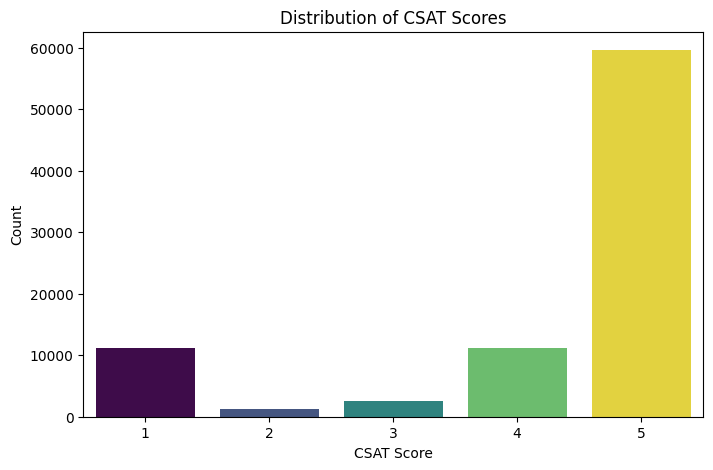

In [43]:
plt.figure(figsize=(8,5))
sns.countplot(x='CSAT Score',hue = "CSAT Score",legend = False ,  data=df, palette='viridis')
plt.title('Distribution of CSAT Scores')
plt.xlabel('CSAT Score')
plt.ylabel('Count')
plt.show()

# CSAT by Tenure Bucket (Ordinal)

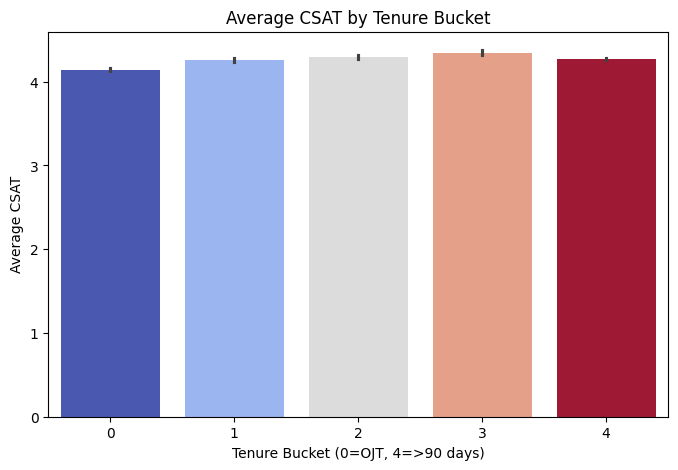

In [44]:
plt.figure(figsize=(8,5))
sns.barplot(x='Tenure Bucket', y='CSAT Score', hue = 'Tenure Bucket' ,legend = False, data=df, estimator='mean', palette='coolwarm')
plt.title('Average CSAT by Tenure Bucket')
plt.xlabel('Tenure Bucket (0=OJT, 4=>90 days)')
plt.ylabel('Average CSAT')
plt.show()

# Top Agents by Average CSAT

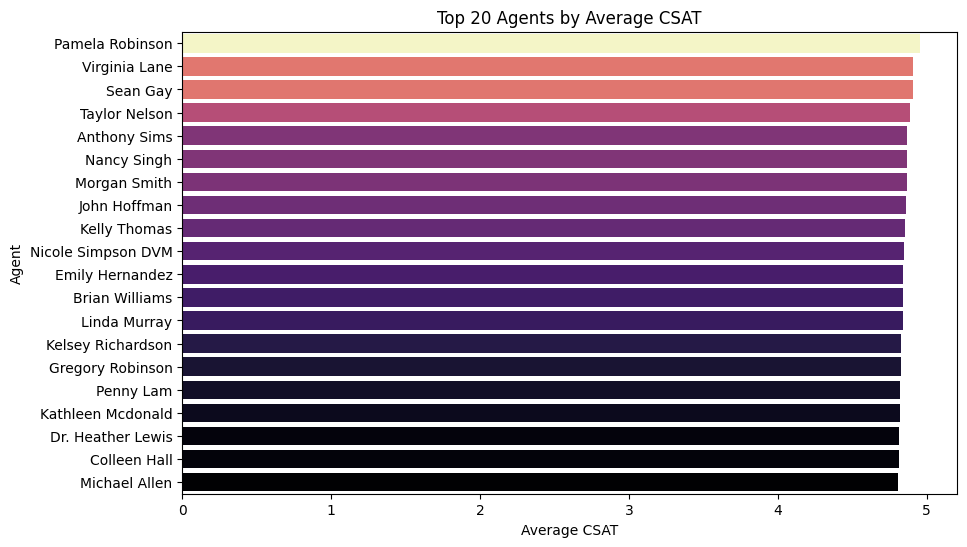

In [45]:
plt.figure(figsize=(10,6))
top_agents = df.groupby('Agent_name')['CSAT Score'].mean().sort_values(ascending=False).head(20)
sns.barplot(x=top_agents.values, y=top_agents.index, hue = top_agents.values, legend = False, palette='magma')
plt.title('Top 20 Agents by Average CSAT')
plt.xlabel('Average CSAT')
plt.ylabel('Agent')
plt.show()

# CSAT vs Response Time

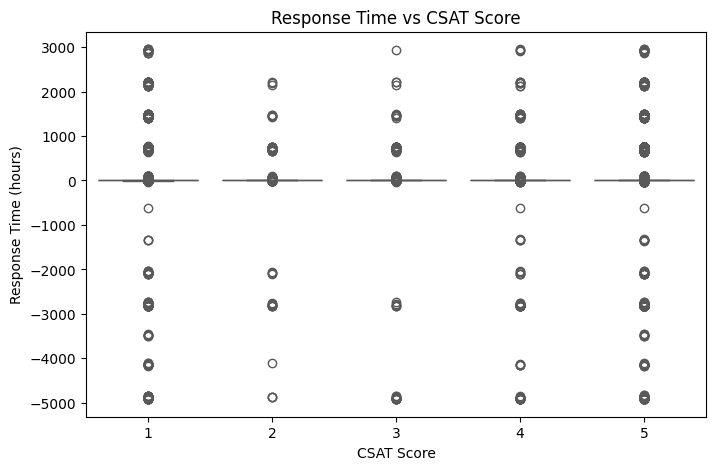

In [46]:
plt.figure(figsize=(8,5))
sns.boxplot(x='CSAT Score', y='response_time_hours', hue = 'CSAT Score', legend = False, data=df, palette='Set2')
plt.title('Response Time vs CSAT Score')
plt.xlabel('CSAT Score')
plt.ylabel('Response Time (hours)')
plt.show()

# CSAT by Agent Shift

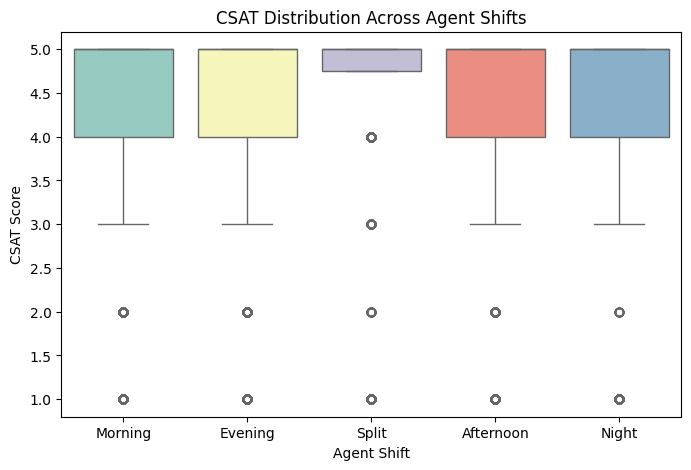

In [47]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Agent Shift', y='CSAT Score',hue = 'Agent Shift', legend = False, data=df, palette='Set3')
plt.title('CSAT Distribution Across Agent Shifts')
plt.xlabel('Agent Shift')
plt.ylabel('CSAT Score')
plt.show()


# CSAT by Product Category

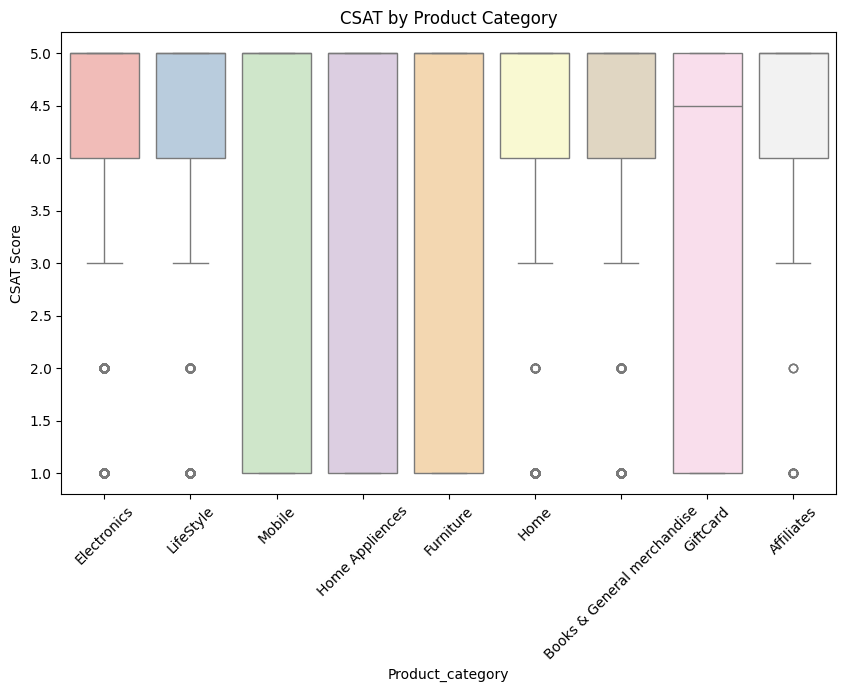

In [48]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Product_category', y='CSAT Score',hue = 'Product_category', legend = False, data=df, palette='Pastel1')
plt.title('CSAT by Product Category')
plt.xticks(rotation=45)
plt.show()

# Missing Values Heatmap

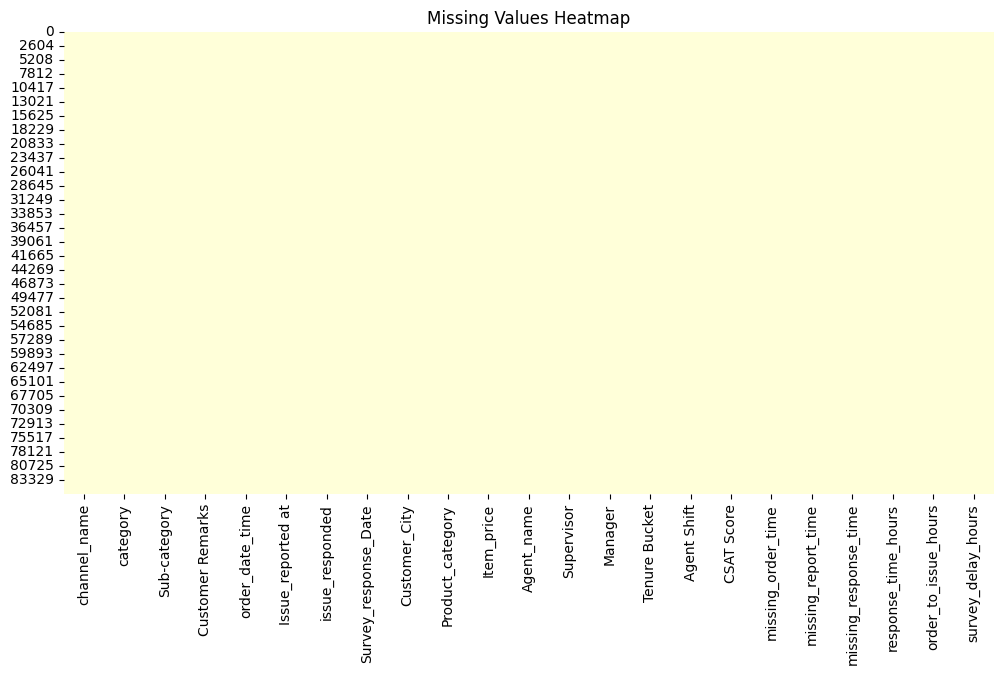

In [49]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='YlGnBu')
plt.title('Missing Values Heatmap')
plt.show()

# Response Time Distribution

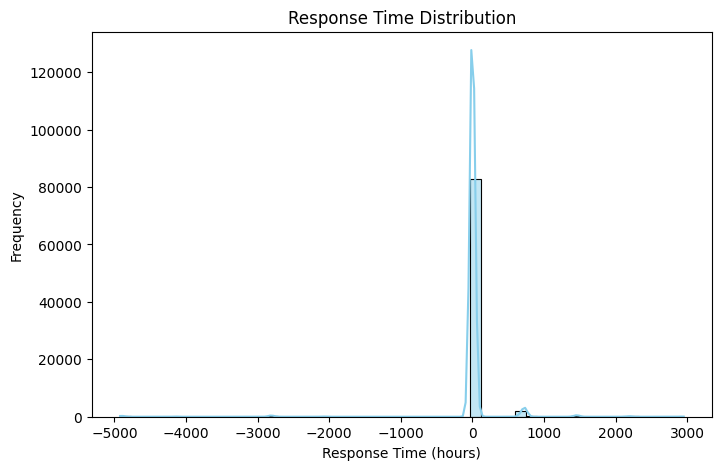

In [50]:
plt.figure(figsize=(8,5))
sns.histplot(df['response_time_hours'], bins=50, kde=True, color='skyblue')
plt.title('Response Time Distribution')
plt.xlabel('Response Time (hours)')
plt.ylabel('Frequency')
plt.show()


# Survey Delay vs CSAT

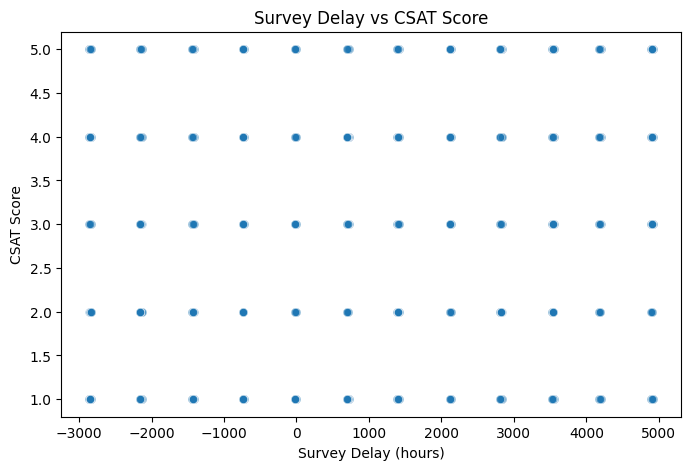

In [51]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='survey_delay_hours', y='CSAT Score', data=df, alpha=0.5)
plt.title('Survey Delay vs CSAT Score')
plt.xlabel('Survey Delay (hours)')
plt.ylabel('CSAT Score')
plt.show()

# Correlation Heatmap (Numeric Features)

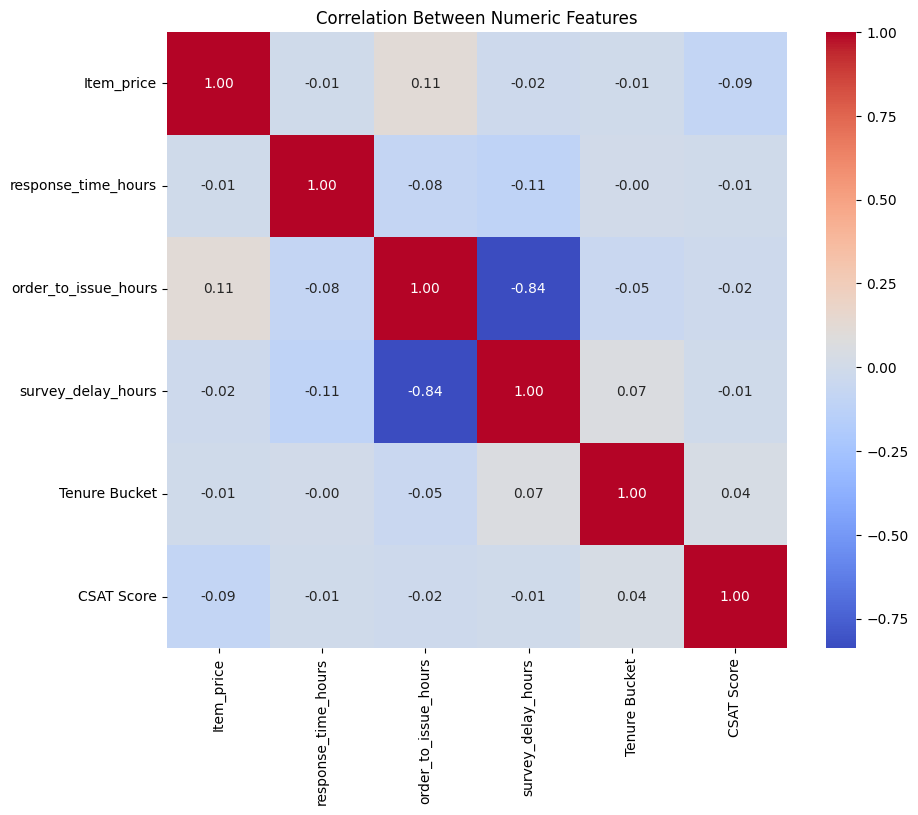

In [52]:
plt.figure(figsize=(10,8))
numeric_cols = ['Item_price', 'response_time_hours', 'order_to_issue_hours', 'survey_delay_hours', 'Tenure Bucket', 'CSAT Score']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Numeric Features')
plt.show()

In [53]:
df.isna().sum()

channel_name             0
category                 0
Sub-category             0
Customer Remarks         0
order_date_time          0
Issue_reported at        0
issue_responded          0
Survey_response_Date     0
Customer_City            0
Product_category         0
Item_price               0
Agent_name               0
Supervisor               0
Manager                  0
Tenure Bucket            0
Agent Shift              0
CSAT Score               0
missing_order_time       0
missing_report_time      0
missing_response_time    0
response_time_hours      0
order_to_issue_hours     0
survey_delay_hours       0
dtype: int64

In [55]:
df.shape

(85906, 23)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85906 entries, 0 to 85906
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   channel_name           85906 non-null  object        
 1   category               85906 non-null  object        
 2   Sub-category           85906 non-null  object        
 3   Customer Remarks       85906 non-null  object        
 4   order_date_time        85906 non-null  datetime64[ns]
 5   Issue_reported at      85906 non-null  datetime64[ns]
 6   issue_responded        85906 non-null  datetime64[ns]
 7   Survey_response_Date   85906 non-null  datetime64[ns]
 8   Customer_City          85906 non-null  object        
 9   Product_category       85906 non-null  object        
 10  Item_price             85906 non-null  float64       
 11  Agent_name             85906 non-null  object        
 12  Supervisor             85906 non-null  object        
 13  Manage

In [57]:
df.head()

,channel_name,category,Sub-category,Customer Remarks,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,...,Manager,Tenure Bucket,Agent Shift,CSAT Score,missing_order_time,missing_report_time,missing_response_time,response_time_hours,order_to_issue_hours,survey_delay_hours
0,Outcall,Product Queries,Life Insurance,Good,2023-09-08 11:55:00,2023-01-08 11:13:00,2023-01-08 11:47:00,2023-08-01,HYDERABAD,Electronics,...,Jennifer Nguyen,0,Morning,5,0,0,0,0.566667,-5832.700000,4908.216667
1,Outcall,Product Queries,Product Specific Information,Good,2023-09-08 11:55:00,2023-01-08 12:52:00,2023-01-08 12:54:00,2023-08-01,HYDERABAD,Electronics,...,Michael Lee,4,Morning,5,0,0,0,0.033333,-5831.050000,4907.100000
2,Inbound,Order Related,Installation/demo,Good,2023-09-08 11:55:00,2023-01-08 20:16:00,2023-01-08 20:38:00,2023-08-01,HYDERABAD,Electronics,...,William Kim,0,Evening,5,0,0,0,0.366667,-5823.650000,4899.366667
3,Inbound,Returns,Reverse Pickup Enquiry,Good,2023-09-08 11:55:00,2023-01-08 20:56:00,2023-01-08 21:16:00,2023-08-01,HYDERABAD,Electronics,...,John Smith,4,Evening,5,0,0,0,0.333333,-5822.983333,4898.733333
4,Inbound,Cancellation,Not Needed,Good,2023-09-08 11:55:00,2023-01-08 10:30:00,2023-01-08 10:32:00,2023-08-01,HYDERABAD,Electronics,...,Michael Lee,1,Morning,5,0,0,0,0.033333,-5833.416667,4909.466667


## Get all new Categorical Columns

In [63]:
categorical_cols = df.select_dtypes(include=['object', 'datetime64[ns]'])

In [64]:
categorical_cols_list = categorical_cols.columns.to_list()

In [66]:
categorical_cols_list

['channel_name',
 'category',
 'Sub-category',
 'Customer Remarks',
 'order_date_time',
 'Issue_reported at',
 'issue_responded',
 'Survey_response_Date',
 'Customer_City',
 'Product_category',
 'Agent_name',
 'Supervisor',
 'Manager',
 'Agent Shift']

## Get All New numerical features

In [67]:
numerical_cols = df.select_dtypes(include=['int64', 'float64'])

In [68]:
numerical_cols_list = numerical_cols.columns.tolist()

In [69]:
numerical_cols_list

['Item_price',
 'Tenure Bucket',
 'CSAT Score',
 'missing_order_time',
 'missing_report_time',
 'missing_response_time',
 'response_time_hours',
 'order_to_issue_hours',
 'survey_delay_hours']

# Check for skewness

In [80]:
for col in numerical_cols_list:
    # 1. Calculate skewness for the current column
    pandas_skew = df[col].skew()
    
    # 2. Print the result for the current column
    print(f"Skewness of {col}: {pandas_skew:.4f}")

Skewness of Item_price: 9.8405
Skewness of Tenure Bucket: -0.0288
Skewness of CSAT Score: -1.6707
Skewness of missing_order_time: 0.0000
Skewness of missing_report_time: 0.0000
Skewness of missing_response_time: 0.0000
Skewness of response_time_hours: -7.6319
Skewness of order_to_issue_hours: 0.2130
Skewness of survey_delay_hours: 1.1461


## Since there is skewness  we have to balance this.

## Handling Skwed Data

In [ ]:
## TODO : 1. handel skewness
## TODO : 2. handel imbalance data 
## TODO : 3. Encode categorical features
## TODO : 4. scale numerical features  